In [66]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
import pandas as pd, numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import random

test1=pd.read_csv('newemer.csv', header=None)
test2=pd.read_csv('newnor.csv', header=None)
test1["label"] = "unsafe"
test2["label"] = "safe"

In [67]:
csv=pd.concat([test1, test2])
bclass = {'safe':[1, 0], 'unsafe':[0, 1]}
y = np.empty((len(csv), 2))
for i, v in enumerate(csv['label']):
    y[i] = bclass[v]

del csv['label']
#X = csv[['delta','theta','lowAlpha','highAlpha','lowBeta','highBeta','lowGamma','midGamma','Meditation','Attention']].to_numpy()
X=csv.to_numpy()

scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)
#print(X_rob)
# np.mean(X_rob), np.std(X_rob)

tmp = [[x,y_tmp] for x, y_tmp in zip(X, y)]
random.shuffle(tmp)
X= [n[0] for n in tmp]
y = [n[1] for n in tmp]

X = np.asarray(X, dtype=np.float32)
y = np.asarray(y, dtype=np.float32)
print(len(X), len(y))

5674 5674


In [68]:
x_train, y_train = X[1:4800], y[1:4800]
x_test, y_test = X[4800:], y[4800:]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(4799, 10) (4799, 2) (874, 10) (874, 2)


In [69]:
model = Sequential()
"""
model.add(Convolution2D(32, 3, 3,
                        border_mode='same',
                        input_shape=X_train.shape[1:]))
                        """
model.add(Dense(512, input_shape=(10,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
# model.add(Dense(256, activation='relu'))

model.add(Dense(2, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [70]:
#모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, 
                 batch_size=128, validation_data=(x_test, y_test),verbose=2)

Train on 4799 samples, validate on 874 samples
Epoch 1/30
 - 0s - loss: 0.2967 - accuracy: 0.9039 - val_loss: 0.2837 - val_accuracy: 0.9090
Epoch 2/30
 - 0s - loss: 0.2236 - accuracy: 0.9309 - val_loss: 0.2573 - val_accuracy: 0.9262
Epoch 3/30
 - 0s - loss: 0.2101 - accuracy: 0.9318 - val_loss: 0.2445 - val_accuracy: 0.9268
Epoch 4/30
 - 0s - loss: 0.2010 - accuracy: 0.9354 - val_loss: 0.2295 - val_accuracy: 0.9279
Epoch 5/30
 - 0s - loss: 0.1911 - accuracy: 0.9377 - val_loss: 0.2274 - val_accuracy: 0.9245
Epoch 6/30
 - 0s - loss: 0.1915 - accuracy: 0.9375 - val_loss: 0.2282 - val_accuracy: 0.9285
Epoch 7/30
 - 0s - loss: 0.1842 - accuracy: 0.9390 - val_loss: 0.2110 - val_accuracy: 0.9302
Epoch 8/30
 - 0s - loss: 0.1801 - accuracy: 0.9393 - val_loss: 0.2100 - val_accuracy: 0.9325
Epoch 9/30
 - 0s - loss: 0.1773 - accuracy: 0.9427 - val_loss: 0.2268 - val_accuracy: 0.9331
Epoch 10/30
 - 0s - loss: 0.1723 - accuracy: 0.9421 - val_loss: 0.2309 - val_accuracy: 0.9308
Epoch 11/30
 - 0s - lo

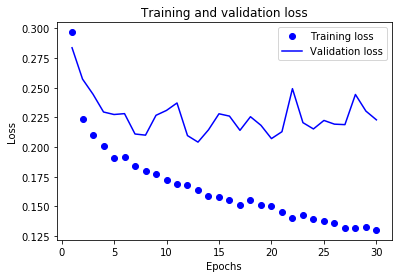

In [71]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.draw()
# fig1 = plt.gcf()
plt.show()
# fig1.savefig('fig1.png', dpi=100)

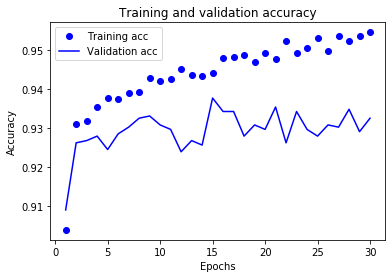

In [72]:
plt.clf()   # 그래프를 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

fig2 = plt.gcf()

plt.draw()

In [73]:
dat=pd.read_csv('normal_train.csv')

# dat.drop(['Unnamed: 0'], axis=1, inplace=True)
# print(dat)
X = dat.to_numpy()
X = scaler.transform(X)
xhat = X[0:1]
res = {
    "total":len(X),
    "safe":0,
    "emergency":0
}
for i in range(0,len(X)):
    yhat = model.predict_classes(X[i:i+1])
    if yhat == [0]:
        res["safe"]+=1
    else :
        res["emergency"]+=1


In [74]:
print(res)
print("safe: "+str(float(res["safe"])/float(res["total"])*100)+"%")

{'total': 6303, 'safe': 5882, 'emergency': 421}
safe: 93.32064096462003%


In [33]:
model_json = model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)

In [10]:
model.save("eeg_model3.h5")

In [11]:
from sklearn.externals import joblib 
# 객체를 pickled binary file 형태로 저장한다 
file_name = 'robust_scaler2.pkl' 
joblib.dump(scaler, file_name) 

C:\Users\HAYOUNG LEE\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['robust_scaler2.pkl']